In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Analytics and Statistics using Python
## S11: Working with Pandas

<img src='../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com"/>

## Pandas

Pandas is an open source, high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
Pandas adds data structures and tools designed to work with table-like data which is *Series* and *Data Frames*.
Pandas provides tools for data manipulation: 

- reshaping
- merging
- sorting
- slicing
- aggregation
- imputation.
If you are using anaconda, you do not have install pandas.

### Installing Pandas


#### For Mac:

> pip install conda

> conda install pandas


#### For Windows:

> pip install conda

> pip install pandas

Pandas data structure is based on `Series` and `DataFrames`. 

A `series` is a `column` and a `DataFrame` is a `multidimensional table` made up of collection of `series`. In order to create a pandas series we should use numpy to create a one dimensional arrays or a python list.

In [2]:
###------------------
### Import Statements
###------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
### end of import statements

print ("Numpy Version:", np.__version__)
print ("Pandas Version:", pd.__version__)
print ("Matplot Version:", matplotlib.__version__)

Numpy Version: 1.26.4
Pandas Version: 2.2.2
Matplot Version: 3.9.2


### Creating Pandas Series with Default Index

In [3]:
nums_list = [1, 2, 3, 4,5]
s = pd.Series(nums_list)
print(s)

0    1
1    2
2    3
3    4
4    5
dtype: int64


### Creating  Pandas Series with custom index

In [4]:
nums = [1, 2, 3, 4, 5]
s = pd.Series(nums, index=['a', 'b', 'c', 'd', 'e'])
print(s)

a    1
b    2
c    3
d    4
e    5
dtype: int64


In [5]:
fruits = ['Orange','Banana','Mango']
fruits = pd.Series(fruits, index=[1, 2, 3])
print(fruits)

1    Orange
2    Banana
3     Mango
dtype: object


### Creating Pandas Series from a Dictionary

In [6]:
dct = {'name':'Mohan','country':'India','city':'Pune'}

s = pd.Series(dct)
s

name       Mohan
country    India
city        Pune
dtype: object

### Creating a Constant Pandas Series

In [7]:
s = pd.Series(10, index = [1, 2, 3])
s

1    10
2    10
3    10
dtype: int64

### Creating a  Pandas Series Using Linspace

In [8]:
s = pd.Series(np.linspace(5, 20, 16)) # linspace(starting, end, items)
s

0      5.0
1      6.0
2      7.0
3      8.0
4      9.0
5     10.0
6     11.0
7     12.0
8     13.0
9     14.0
10    15.0
11    16.0
12    17.0
13    18.0
14    19.0
15    20.0
dtype: float64

## DataFrames

Pandas data frames can be created in different ways.

### Creating DataFrames from List of Lists

In [9]:
data = [
    ['Mohan', 'India', 'Pune'], 
    ['Sohan', 'UK', 'London'],
    ['Priya', 'Sweden', 'Stockholm']
]
data_df= pd.DataFrame(data, columns=['Names','Country','City'])
display(data_df)

,Names,Country,City
0,Mohan,India,Pune
1,Sohan,UK,London
2,Priya,Sweden,Stockholm


### Creating DataFrame Using Dictionary

In [10]:
data = {'Name': ['Mohan', 'Sohan', 'Priya'], 'Country':[
    'India', 'UK', 'Sweden'], 'City': ['Pune', 'London', 'Stockholm']}
data_df= pd.DataFrame(data)
display(data_df)

,Name,Country,City
0,Mohan,India,Pune
1,Sohan,UK,London
2,Priya,Sweden,Stockholm


### Creating DataFrames from a List of Dictionaries

In [11]:
data = [
    {'Name': 'Mohan', 'Country': 'India', 'City': 'Pune'},
    {'Name': 'Sohan', 'Country': 'UK', 'City': 'London'},
    {'Name': 'Priya', 'Country': 'Sweden', 'City': 'Stockholm'}]
data_df= pd.DataFrame(data)
display(data_df)

,Name,Country,City
0,Mohan,India,Pune
1,Sohan,UK,London
2,Priya,Sweden,Stockholm


## Modifying a DataFrame

Modifying a DataFrame:
* Add a new column to the DataFrame, 
* Remove an existing column from a DataFrame, 
* Modify an existing column in a DataFrame, 
* Change the data type of column values in the DataFrame

Adding a column to a DataFrame is like adding a key to a dictionary.

### Adding a New Column
Let's add a weight column in the DataFrame

In [12]:
weights = [74, 78, 69]
data_df['Weight'] = weights
heights = [173, 175, 169]
data_df['Height'] = heights
data_df

,Name,Country,City,Weight,Height
0,Mohan,India,Pune,74,173
1,Sohan,UK,London,78,175
2,Priya,Sweden,Stockholm,69,169


As you can see in the DataFrame above, we did add new columns, Weight and Height. 
**Note:** *make sure that index of new column is aligned with existing DataFrame*.

Let's add one additional column called BMI(Body Mass Index) by calculating their BMI using thier mass and height. BMI is mass divided by height squared (in meters) - Weight/Height * Height.

As you can see, the height is in centimeters, so we shoud change it to meters. Let's modify the height row.

### Modifying column values

In [13]:
data_df['Height'] = data_df['Height'] * 0.01
data_df

,Name,Country,City,Weight,Height
0,Mohan,India,Pune,74,1.73
1,Sohan,UK,London,78,1.75
2,Priya,Sweden,Stockholm,69,1.69


### Using functions makes our code clean, but you can calculate the bmi without one

In [14]:
def calculate_bmi (df):
    weights = df['Weight']
    heights = df['Height']
    bmi = []
    for w,h in zip(weights, heights):
        b = w/(h*h)
        bmi.append(b)
    return bmi
    
data_df['BMI'] = calculate_bmi(data_df)
data_df

,Name,Country,City,Weight,Height,BMI
0,Mohan,India,Pune,74,1.73,24.725183
1,Sohan,UK,London,78,1.75,25.469388
2,Priya,Sweden,Stockholm,69,1.69,24.158818


### Formating DataFrame columns

The BMI column values of the DataFrame are float with many significant digits after decimal. Let's change it to one significant digit after point.

In [15]:
data_df['BMI'] = data_df['BMI'].round(2)
data_df

,Name,Country,City,Weight,Height,BMI
0,Mohan,India,Pune,74,1.73,24.73
1,Sohan,UK,London,78,1.75,25.47
2,Priya,Sweden,Stockholm,69,1.69,24.16


### Adding birth year to the dataframe

In [16]:
birth_year = ['1769', '1985', '1990'] # note apearent integers, supplied as strings
current_year = pd.Series(2024, index=[0, 1,2])
data_df['Birth Year'] = birth_year
data_df['Current Year'] = current_year
data_df

,Name,Country,City,Weight,Height,BMI,Birth Year,Current Year
0,Mohan,India,Pune,74,1.73,24.73,1769,2024
1,Sohan,UK,London,78,1.75,25.47,1985,2024
2,Priya,Sweden,Stockholm,69,1.69,24.16,1990,2024


In [17]:
# Inputs were string
data_df['Birth Year'].dtype

dtype('O')

In [18]:
data_df['Birth Year'] = data_df['Birth Year'].astype(np.int16)
data_df['Birth Year'].dtype # let's check the data type now

dtype('int16')

In [19]:
# We can calculate the age.
data_df['Age'] = data_df['Current Year'] - data_df['Birth Year']
data_df['Age'] = data_df['Age'].astype(np.float16)
data_df

,Name,Country,City,Weight,Height,BMI,Birth Year,Current Year,Age
0,Mohan,India,Pune,74,1.73,24.73,1769,2024,255.0
1,Sohan,UK,London,78,1.75,25.47,1985,2024,39.0
2,Priya,Sweden,Stockholm,69,1.69,24.16,1990,2024,34.0


The person in the first row lived so far for 255 years. It is unlikely for someone to live so long. Either it is a typo or the data is cooked. So lets fill that data with average of the columns without including outlier. 

In [20]:
mean = (35 + 30)/ 2
print('Mean: ',mean)	#it is good to add some description to the output, so we know what is what

Mean:  32.5


In [21]:
data_df.loc[data_df['Age'] > 120, 'Age'] = mean
data_df

,Name,Country,City,Weight,Height,BMI,Birth Year,Current Year,Age
0,Mohan,India,Pune,74,1.73,24.73,1769,2024,32.5
1,Sohan,UK,London,78,1.75,25.47,1985,2024,39.0
2,Priya,Sweden,Stockholm,69,1.69,24.16,1990,2024,34.0


## Reading CSV File Using Pandas
We will be reading file from the input directory.

In [22]:
#### Read CSV file and inspect elements

# Initialize all variable
data_file = '../../input/machine_learning/movie_rating.csv'

# Read the CSV file

data_df = pd.read_csv(data_file, sep=',', header = 0)

print ("Read CSV file of shape {}".format(data_df.shape),
           flush = True)

# Lets list a few rows of the Dataframe

data_df.head()

Read CSV file of shape (10, 9)


,Name,Year,Rating,Description,Genre_1,Genre_2,Genre_3,Certificate,Runtime
0,Sunset Blvd.,1950,8.7,A hack screenwriter writes a screenplay for a ...,Drama,Film-Noir,NaN,APPROVED,110
1,12 Angry Men (1957),1957,8.9,A dissenting juror in a murder trial slowly ma...,Crime,Drama,NaN,APPROVED,96
2,Dr. Strangelove or: How I Learned to Stop Worr...,1964,8.5,An insane general triggers a path to nuclear h...,Comedy,NaN,NaN,APPROVED,95
3,The Godfather,1972,9.2,"""The aging patriarch of an organized crime dy...",Crime,Drama,NaN,R,175
4,The Godfather: Part II (1974),1974,9.1,The early life and career of Vito Corleone in ...,Crime,Drama,NaN,R,202


In [23]:
# Lets list column names of the Dataframe
data_df.columns # alternatively data_df.keys()

Index(['Name', 'Year', 'Rating', 'Description', 'Genre_1', 'Genre_2',
       'Genre_3', 'Certificate', 'Runtime'],
      dtype='object')

In [24]:
# Columns can be of any datatype. Datatype is selected automatically
data_df.dtypes

Name            object
Year             int64
Rating         float64
Description     object
Genre_1         object
Genre_2         object
Genre_3         object
Certificate     object
Runtime          int64
dtype: object

In [25]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         10 non-null     object 
 1   Year         10 non-null     int64  
 2   Rating       10 non-null     float64
 3   Description  10 non-null     object 
 4   Genre_1      10 non-null     object 
 5   Genre_2      9 non-null      object 
 6   Genre_3      2 non-null      object 
 7   Certificate  10 non-null     object 
 8   Runtime      10 non-null     int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 848.0+ bytes


In [26]:
data_df.head()

,Name,Year,Rating,Description,Genre_1,Genre_2,Genre_3,Certificate,Runtime
0,Sunset Blvd.,1950,8.7,A hack screenwriter writes a screenplay for a ...,Drama,Film-Noir,NaN,APPROVED,110
1,12 Angry Men (1957),1957,8.9,A dissenting juror in a murder trial slowly ma...,Crime,Drama,NaN,APPROVED,96
2,Dr. Strangelove or: How I Learned to Stop Worr...,1964,8.5,An insane general triggers a path to nuclear h...,Comedy,NaN,NaN,APPROVED,95
3,The Godfather,1972,9.2,"""The aging patriarch of an organized crime dy...",Crime,Drama,NaN,R,175
4,The Godfather: Part II (1974),1974,9.1,The early life and career of Vito Corleone in ...,Crime,Drama,NaN,R,202


In [27]:
# Lets see the third row
data_df.xs(2)

Name           Dr. Strangelove or: How I Learned to Stop Worr...
Year                                                        1964
Rating                                                       8.5
Description    An insane general triggers a path to nuclear h...
Genre_1                                                   Comedy
Genre_2                                                      NaN
Genre_3                                                      NaN
Certificate                                             APPROVED
Runtime                                                       95
Name: 2, dtype: object

In [28]:
# We can also see third row using following format
data_df.iloc[2]

Name           Dr. Strangelove or: How I Learned to Stop Worr...
Year                                                        1964
Rating                                                       8.5
Description    An insane general triggers a path to nuclear h...
Genre_1                                                   Comedy
Genre_2                                                      NaN
Genre_3                                                      NaN
Certificate                                             APPROVED
Runtime                                                       95
Name: 2, dtype: object

In [29]:
# Lets see element in second row in a column say 'Description'
data_df.loc[2, 'Description'] # remember row numbering start from 0

'An insane general triggers a path to nuclear holocaust that a war room full of politicians and generals frantically try to stop.'

In [30]:
data_df.describe()

,Year,Rating,Runtime
count,10.00000,10.000000,10.000000
mean,1978.80000,8.870000,143.700000
std,19.35516,0.286938,39.763328
min,1950.00000,8.500000,95.000000
25%,1966.00000,8.625000,110.750000
50%,1974.50000,8.900000,147.000000
75%,1994.00000,9.075000,169.750000
max,2008.00000,9.300000,202.000000


In [31]:
# Suppose we are interested in movies which have been rated 9 and above
data_df.Rating > 9

0    False
1    False
2    False
3     True
4     True
5    False
6     True
7    False
8    False
9    False
Name: Rating, dtype: bool

In [32]:
# we will get part dataframe if we pass above condition.
data_df[data_df.Rating > 9]

,Name,Year,Rating,Description,Genre_1,Genre_2,Genre_3,Certificate,Runtime
3,The Godfather,1972,9.2,"""The aging patriarch of an organized crime dy...",Crime,Drama,NaN,R,175
4,The Godfather: Part II (1974),1974,9.1,The early life and career of Vito Corleone in ...,Crime,Drama,NaN,R,202
6,The Shawshank Redemption,1994,9.3,Two imprisoned men bond over a number of years...,Crime,Drama,NaN,R,142


 # Dataframe functions

In [33]:
# Define a dataframe with all columns as float
num_df = pd.DataFrame(np.random.randn(100,4), columns = list('ABCD'))

In [34]:
num_df.head()

,A,B,C,D
0,0.596934,0.058861,-0.281763,3.070358
1,2.483427,-1.639922,0.058677,0.758922
2,-2.585249,-0.254749,-0.720544,-1.273847
3,-1.573128,-3.039102,0.731752,0.010048
4,-0.458924,-0.729937,0.253735,-0.561915


In [35]:
# Calulate mean of each column
num_df.apply(np.mean)

A    0.004239
B   -0.106578
C   -0.052117
D    0.075166
dtype: float64

In [36]:
# Alternatively
num_df.mean()

A    0.004239
B   -0.106578
C   -0.052117
D    0.075166
dtype: float64

In [37]:
num_df.mean(1)[:5]

0    0.861098
1    0.415276
2   -1.208597
3   -0.967607
4   -0.374260
dtype: float64

In [38]:
#Groupby function results in grouping by the column in ascending order. 

#This function ignores all non numeric cells and is useful in filling missing values

data_df.groupby('Rating')

In [39]:
# Groupby results in a DataFrameGroupBy object. Lets see its contents

for key, group in data_df.groupby('Rating'):
    print (group[['Rating', 'Year', 'Runtime']])
    print ('*'*50)

   Rating  Year  Runtime
2     8.5  1964       95
5     8.5  1975      198
**************************************************
   Rating  Year  Runtime
8     8.6  2000      113
**************************************************
   Rating  Year  Runtime
0     8.7  1950      110
**************************************************
   Rating  Year  Runtime
1     8.9  1957       96
7     8.9  1994      154
**************************************************
   Rating  Year  Runtime
9     9.0  2008      152
**************************************************
   Rating  Year  Runtime
4     9.1  1974      202
**************************************************
   Rating  Year  Runtime
3     9.2  1972      175
**************************************************
   Rating  Year  Runtime
6     9.3  1994      142
**************************************************


In [40]:
num_df.groupby('A').mean().head()

,B,C,D
A,,,
-2.585249,-0.254749,-0.720544,-1.273847
-2.216211,0.463385,-0.816279,0.177155
-1.746038,0.800746,-0.249122,-1.095340
-1.573128,-3.039102,0.731752,0.010048
-1.529638,0.749423,1.357889,-0.519833


**Note:** that Column A as been set as index. Let's correct it by setting "as_index" parameter as False.

In [41]:
num_df.groupby('A', as_index=False).mean().head()

,A,B,C,D
0,-2.585249,-0.254749,-0.720544,-1.273847
1,-2.216211,0.463385,-0.816279,0.177155
2,-1.746038,0.800746,-0.249122,-1.095340
3,-1.573128,-3.039102,0.731752,0.010048
4,-1.529638,0.749423,1.357889,-0.519833


In [42]:
# Refer http://pandas.pydata.org/pandas-docs/stable/io.html
#The pandas read files of following formats:
#    excel   hdf   sql   json   html   sas pickle

#Correspondingly it can also write to files in above format

### Ploting with Pandas

<Axes: >

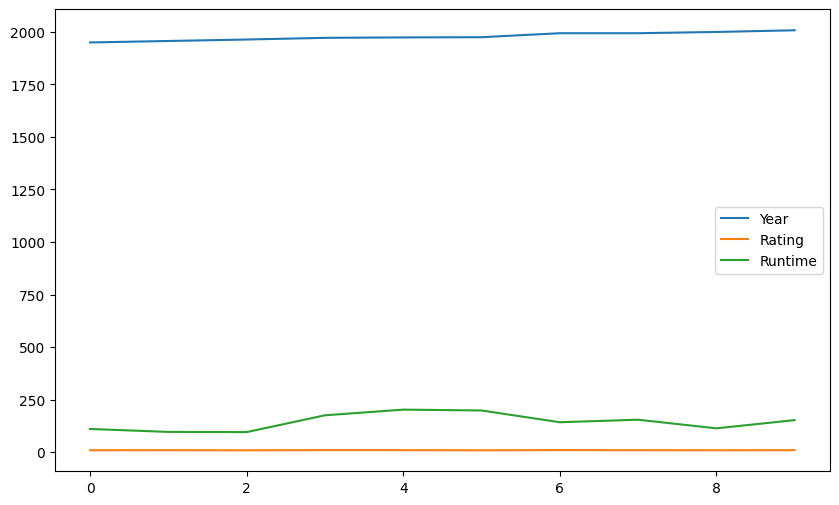

In [43]:
'''import matplotlib.pyplot as plt
import matplotlib'''
data_df.plot(figsize = (10,6))
#plt.plot()

# Lets plot rating vs year for the movies

<Axes: xlabel='Year'>

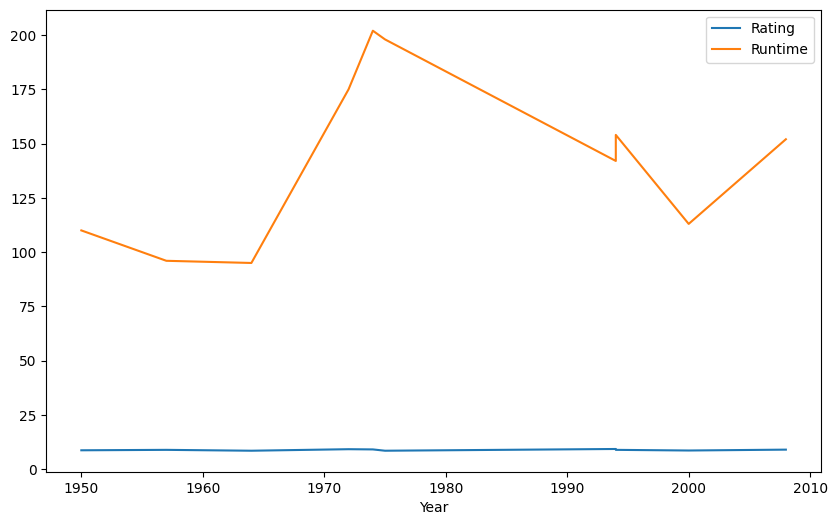

In [44]:
data_df.plot(x = 'Year', figsize=(10,6))

<Axes: xlabel='Year'>

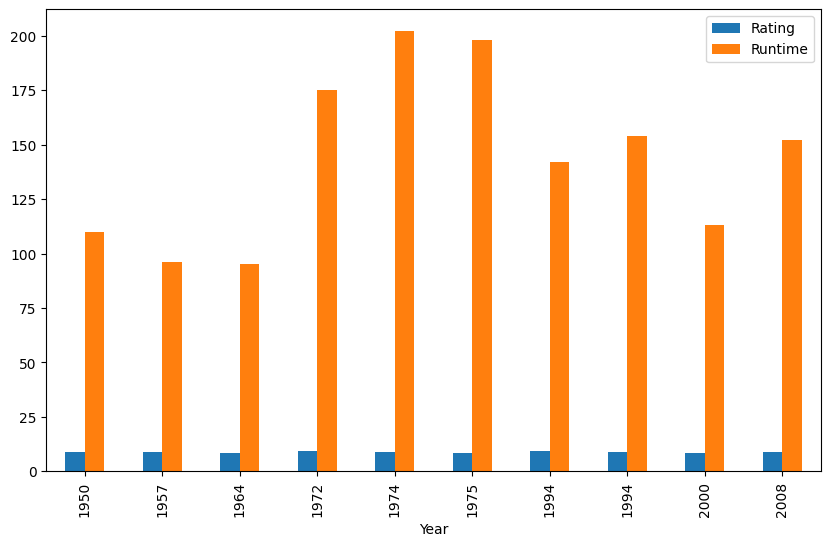

In [45]:
data_df.plot.bar('Year', figsize = (10,6))

<Axes: xlabel='Year'>

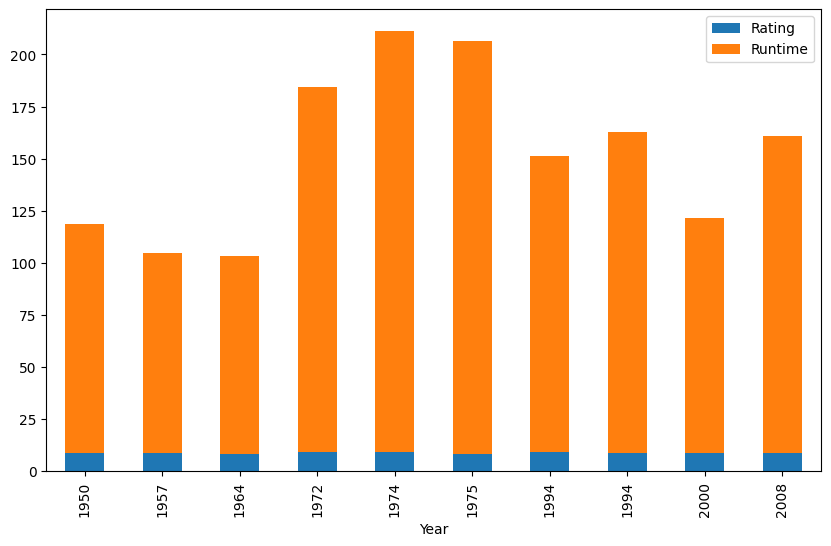

In [46]:
data_df.plot.bar('Year', stacked = True, figsize = (10,6))

<Axes: >

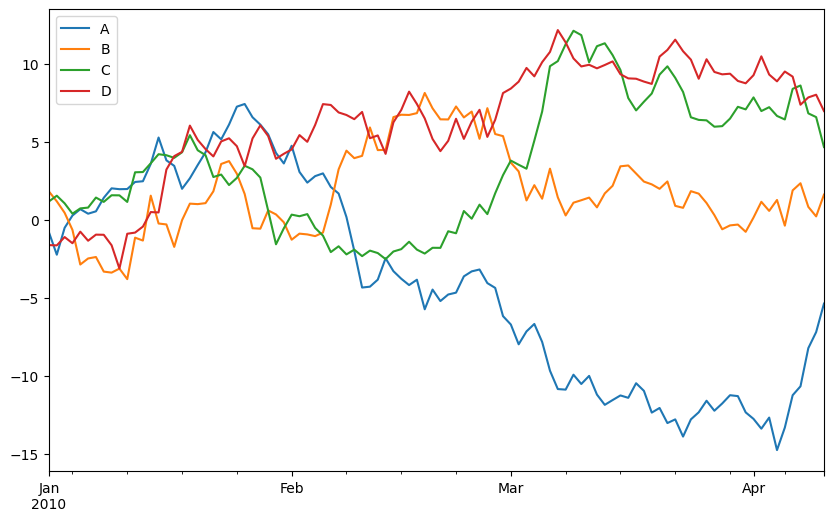

In [47]:
# Generate a time series with 100 data points generated randomly
timeseries = pd.Series(np.random.randn(100), index=pd.date_range('1/1/2010', periods=100))
#Using index of time series, generate a dataframe with 4 columns
ts_df = pd.DataFrame(np.random.randn(100, 4), index=timeseries.index, columns=list('ABCD'))

ts_df = ts_df.cumsum() # to help separating the lines

ts_df.plot(figsize = (10,6))
#plt.savefig("../images/create_df.jpg")

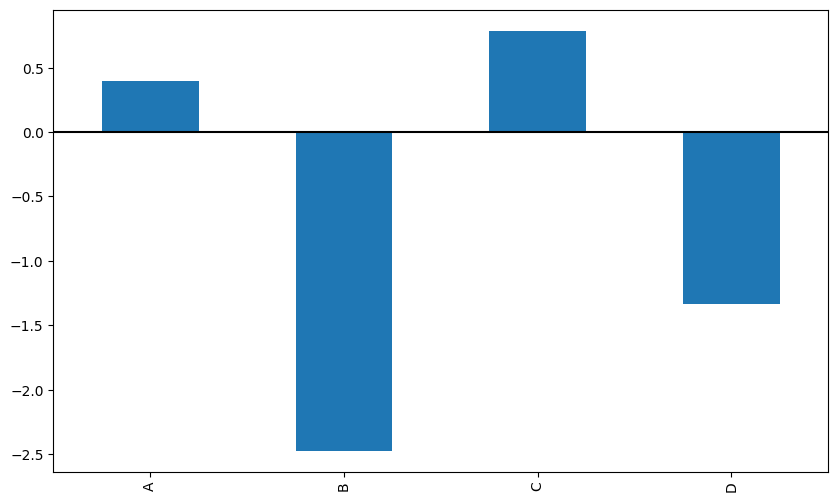

In [48]:
# Create a bar diagram
#We will be using just one row, say row 5

ts_df.iloc[5].plot(kind = 'bar', figsize = (10,6))
plt.axhline(0, color = 'k')
#plt.savefig("../images/12_plot_bar.jpg")

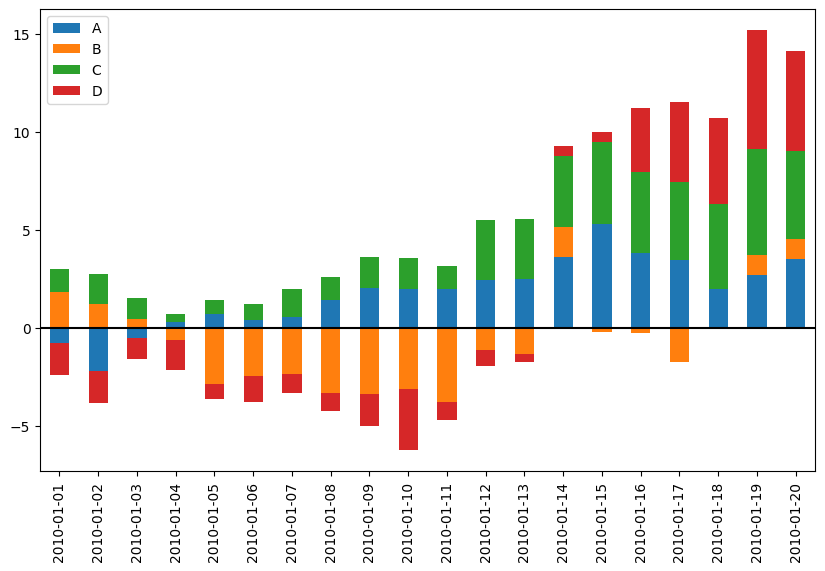

In [49]:
# Plot stacked bars

ax = ts_df[:20].plot (kind = 'bar', figsize = (10,6), stacked = True)

ax.set_xticklabels([pandas_datetime.strftime("%Y-%m-%d") 
                    for pandas_datetime in ts_df[:20].index])

plt.axhline(0, color = 'k');
#plt.savefig("../images/12_plot_bar_stacked.jpg")

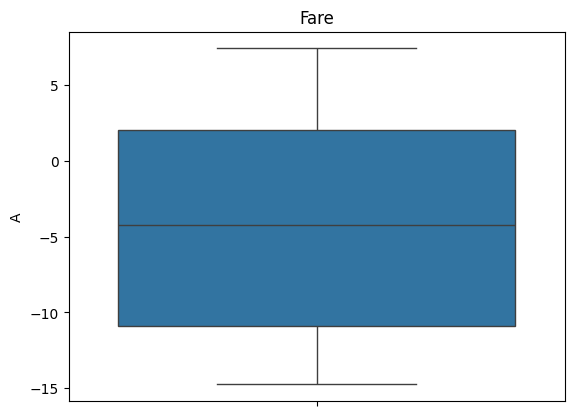

In [50]:
import seaborn as sns

sns.boxplot(data=ts_df, y='A')
plt.title('Fare')
plt.show()

### Using `pivot_table()` in Pandas

In [51]:
# Sample dataset
data = {
    'Product': ['Apple', 'Banana', 'Apple', 'Orange', 'Banana', 'Orange'],
    'Region': ['East', 'West', 'East', 'North', 'West', 'North'],
    'Sales': [200, 150, 250, 300, 100, 400],
    'Quantity': [50, 40, 60, 80, 35, 90]
}

data_df = pd.DataFrame(data)

# Display the original DataFrame
data_df


,Product,Region,Sales,Quantity
0,Apple,East,200,50
1,Banana,West,150,40
2,Apple,East,250,60
3,Orange,North,300,80
4,Banana,West,100,35
5,Orange,North,400,90


In [52]:
# Creating a pivot table
pivot = pd.pivot_table(data_df, values='Sales', index='Product', 
                       columns='Region', 
                       aggfunc='sum', 
                       fill_value=0)

# Display the pivot table
pivot


Region,East,North,West
Product,,,
Apple,450,0,0
Banana,0,0,250
Orange,0,700,0


#### Explanation:
- `values='Sales'`: The values to aggregate (in this case, the Sales column).

- `index='Product'`: The rows will represent different products.

- `columns='Region'`: The columns represent different regions.

- `aggfunc='sum'`: We are summing the sales for each product and region.

- `fill_value=0`: Any missing values (where there are no sales) will be filled with 0.

#### Adding Multiple Aggregation Functions:
You can also calculate multiple aggregations, like sum and mean.

In [54]:
# Pivot table with multiple aggregations
pivot_multiple = pd.pivot_table(data_df, values=['Sales', 'Quantity'],
                                 index='Product', 
                                 aggfunc={'Sales': 'sum', 'Quantity': 'mean'}, 
                                 fill_value=0)

# Display the pivot table with multiple aggregations
print("Pivot Table with Multiple Aggregations:")
pivot_multiple


Pivot Table with Multiple Aggregations:


,Quantity,Sales
Product,,
Apple,55.0,450
Banana,37.5,250
Orange,85.0,700


## EDA
**Exploratory Data Analysis (EDA)** is a critical process in data analysis that involves examining and summarizing the main characteristics of a dataset, often using visual techniques. The goal of EDA is to understand the data's underlying structure, identify patterns, detect anomalies, test hypotheses, and check assumptions before performing more formal modeling.

### Key Objectives of EDA:
1. **Understand the Dataset:**

Identify the types of variables (e.g., numerical, categorical).
Examine the distribution of each variable (e.g., mean, median, variance).
Understand the relationship between variables.

2. **Detect Missing Values:**

Identify which variables have missing data.
Determine the proportion of missing data and how to handle it (e.g., imputation, removal).

3. **Spot Outliers:**

Detect and analyze outliers that could skew results or provide insights.

4. **Visualize Data:**

Use visual tools like histograms, box plots, scatter plots, and heatmaps to identify trends, correlations, and patterns.

5. **Hypothesis Generation:**

Based on the findings from EDA, generate hypotheses that can be tested with more formal statistical methods or machine learning models.

### Common Techniques Used in EDA:
- **Summary Statistics:** Mean, median, mode, standard deviation, etc.
- **Data Visualization:** Graphs and plots such as bar charts, histograms, scatter plots, and box plots.
Correlation Analysis: Understanding how variables are related to each other.
- **Data Cleaning:** Handling missing data, correcting errors, and dealing with outliers.
EDA is often considered the first step in data analysis, providing a foundation for further modeling and in-depth analysis. By thoroughly understanding the dataset through EDA, analysts can make better-informed decisions about the subsequent steps in the data science process.